In [2]:
#把guazi_bj（北京）、guazi_gz（广州）、guazi_sh（上海）、guazi_sz（深圳）二手车的数据归类在一个DataFrame中。
#新增车辆使用年份（use_year）与保值率（hedge_rate）两个字段。其中使用年份的计算是把当前的时间减去购买的时间，然后再转换成年；保值率的计算是将二手车的价格/新车的价格。
# 把二手车使用年份与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。
# 把二手车的行驶距离与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname="C:\Windows\Fonts\simkai.ttf")
font.set_size(15)

In [20]:
bj = pd.read_csv("guazi_bj.csv")
gz = pd.read_csv("guazi_gz.csv")
sh = pd.read_csv("guazi_sh.csv")
sz = pd.read_csv("guazi_sz.csv")
data = pd.concat([bj,gz,sh,sz])
data.head(2)

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.0,13.0,北京,2014款,紧凑型,0,105马力,汽油,4523,1775,1467,NaN,前置前驱
1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.8,13.0,北京,2015款,紧凑型,0,113马力,汽油,4587,1825,1490,NaN,前置前驱


In [92]:
# 计算汽车使用年份
import datetime
buy_time = pd.to_datetime(data["buy_time"])
now_time = datetime.datetime.now()
use_time = now_time - buy_time
data["use_year"] = use_time.map(lambda x: x.days/365)
# 计算汽车保值率
data["hedge_rate_str"] = (data["es_price"]/data["new_price"]).map(lambda x : format(x,".1%"))
data["hedge_rate"] = data["es_price"]/data["new_price"]
# 筛选数据
data1 = data[["use_year","hedge_rate"]]
data2 = data[["km","hedge_rate"]]

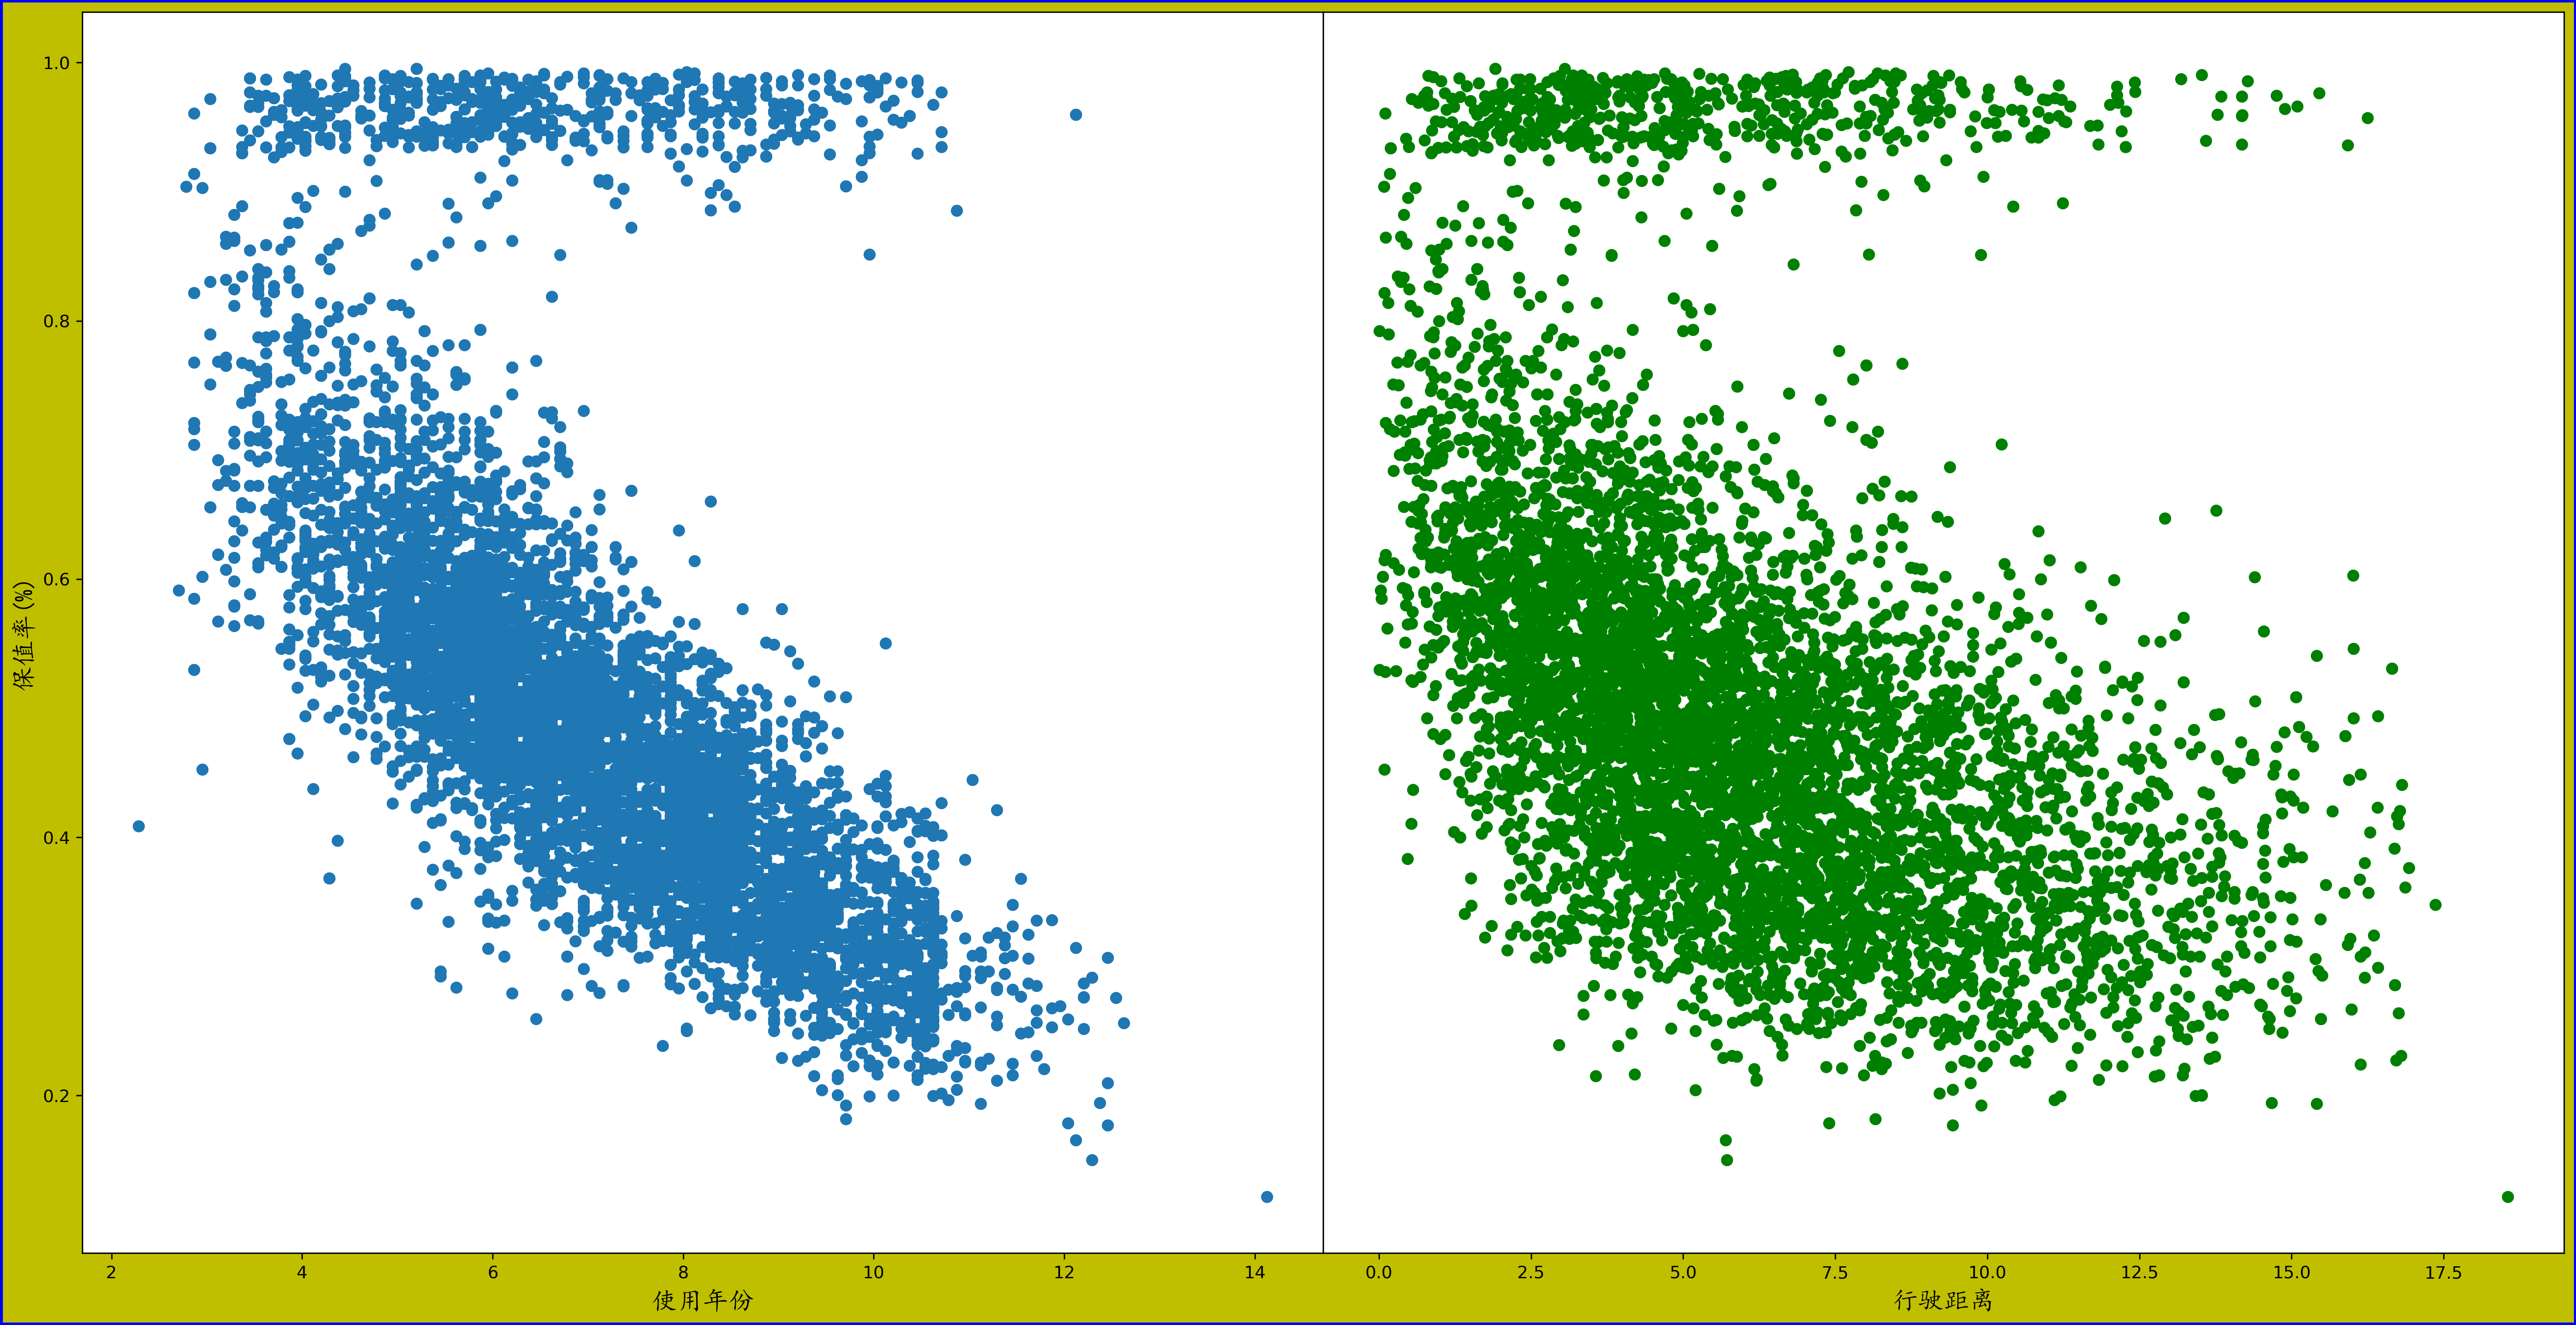

In [137]:
import matplotlib
#绘图
fig = plt.figure(dpi=300,figsize=(20,10),facecolor="y",frameon=True,edgecolor="b",linewidth=3)
ax1 = fig.add_axes([0,0,0.5,1])
ax1.scatter("use_year","hedge_rate",data=data1)
ax2 = fig.add_axes([0.5,0,0.5,1])
ax2.scatter("km","hedge_rate",data=data2,c="g")
#标题
#设置轴标签
ax1.set_ylabel("保值率(%)",fontproperties=font)
ax1.set_xlabel("使用年份",fontproperties=font)
ax2.set_xlabel("行驶距离",fontproperties=font)
#细节
ax2.yaxis.set_visible(False)